In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_ride_df = pd.merge(city_df, ride_df, how='left', on='city')

# Display the data table for preview
combined_city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

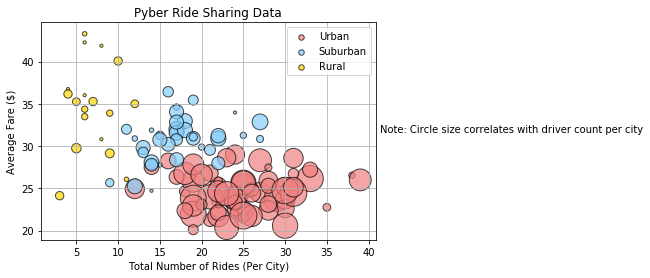

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_index = combined_city_ride_df['type'] == 'Urban'
urban_df = combined_city_ride_df.loc[urban_index,:]
x_urban = urban_df.groupby(['city'])['city'].count()
y_urban = urban_df.groupby(['city'])['fare'].mean()
urban_size = urban_df.groupby(['city'])['driver_count'].mean()*10

suburban_index = combined_city_ride_df['type'] == 'Suburban'
suburban_df = combined_city_ride_df.loc[suburban_index,:]
x_suburban = suburban_df.groupby(['city'])['city'].count()
y_suburban = suburban_df.groupby(['city'])['fare'].mean()
suburban_size = suburban_df.groupby(['city'])['driver_count'].mean()*10

rural_index = combined_city_ride_df['type'] == 'Rural'
rural_df = combined_city_ride_df.loc[rural_index,:] 
x_rural = rural_df.groupby(['city'])['city'].count()
y_rural = rural_df.groupby(['city'])['fare'].mean()
rural_size = rural_df.groupby(['city'])['driver_count'].mean()*10

# Build the scatter plots for each city types
urban_plot = plt.scatter(x_urban, y_urban, marker='o', facecolors='lightcoral', edgecolors = 'black', alpha = .7, s=urban_size)
suburban_plot = plt.scatter(x_suburban, y_suburban, marker='o', facecolors='lightskyblue', edgecolors = 'black', alpha = .7, s=suburban_size)
rural_plot = plt.scatter(x_rural, y_rural, marker='o', facecolors='gold', edgecolors = 'black', alpha = .7, s=rural_size)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(labels=('Urban', 'Suburban', 'Rural'), loc="upper right", markerscale=1, scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(.91,.5,"Note: Circle size correlates with driver count per city")

# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

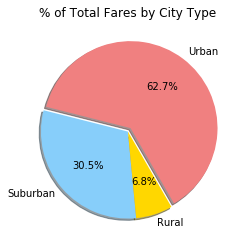

In [4]:
# Calculate Type Percents
tot_sum = combined_city_ride_df['fare'].sum()
pf_urban = urban_df['fare'].sum()/tot_sum*100
pf_suburban = suburban_df['fare'].sum()/tot_sum*100
pf_rural = rural_df['fare'].sum()/tot_sum*100

# Build Pie Chart
sizes = [pf_urban, pf_suburban, pf_rural]
labels=['Urban', 'Suburban', 'Rural']
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (.05,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = "%1.1f%%", shadow = True, startangle=-60)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Total_Fares_by_City_Type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

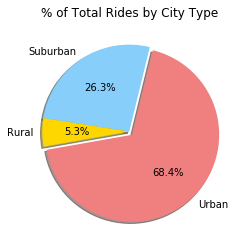

In [6]:
# Calculate Ride Percents
tot_count = combined_city_ride_df['driver_count'].count()
pr_urban = urban_df['ride_id'].count()/tot_count*100
pr_suburban = suburban_df['ride_id'].count()/tot_count*100
pr_rural = rural_df['ride_id'].count()/tot_count*100

# Build Pie Chart
sizes = [pr_urban, pr_suburban, pr_rural]
labels=['Urban', 'Suburban', 'Rural']
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (.05,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = "%1.1f%%", shadow = True, startangle=190)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Total_Rides_by_City_Type.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

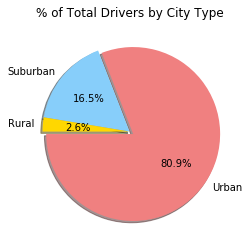

In [8]:
# Calculate Driver Percents
tot_drivers = combined_city_ride_df.groupby(['city'])['driver_count'].mean().sum()
pd_urban = urban_df.groupby(['city'])['driver_count'].mean().sum()/tot_drivers*100
pd_suburban = suburban_df.groupby(['city'])['driver_count'].mean().sum()/tot_drivers*100
pd_rural = rural_df.groupby(['city'])['driver_count'].mean().sum()/tot_drivers*100

# Build Pie Chart
sizes = [pd_urban, pd_suburban, pd_rural]
labels=['Urban', 'Suburban', 'Rural']
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (.05,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = "%1.1f%%", shadow = True, startangle=180)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/Total_Drivers_by_City_Type.png")


In [9]:
# Show Figure
plt.show()

## Observable trends based on the data


1. The number of rides is greater in urban areas that it is in rural areas; however, the average fare is lower than in rural areas

2. Urban areas tend to have more riders and drivers than less populated/ rural areas. 

3. Rural area average fares tend to vary more significantly than in more populated areas. 